In [ ]:
! nvidia-smi

Mon Jan  6 14:19:11 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!unzip -u "/content/drive/MyDrive/Computer Vision and Machine Learning for Medical Data Analysis/Module-4/Lecture 6/Tuberculosis.zip" -d "/content/Xray"
print('\n\ndone!')

Archive:  /content/drive/MyDrive/Computer Vision and Machine Learning for Medical Data Analysis/Module-4/Lecture 6/Tuberculosis.zip
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: /content/Xray/TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: /content/Xray/TB_Chest_Radiography_Databa

In [ ]:
import cv2
import numpy as np
import glob
import os

Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
####### transfer learning model

################# import various transfer elarning models ###################

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import Xception
#############################################################################

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf


##Feature extraction with VGG19

In [ ]:
########
IMAGE_SIZE = [224,224]
CLASS=2
######


#mod =  tf.keras.applications.VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mod = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mod.layers:
    layer.trainable = False

x = Flatten()(mod.output)

prediction = Dense(CLASS, activation='relu')(x)

model = Model(inputs=mod.input, outputs=prediction)

############################ optimizer and learning rate ##################

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################


model.optimizer.get_config()
print("\n\n")
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step





Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 128
CLASS_MODE = 'categorical'
OUTPUT_FEATURES_CSV = 'features_with_labels.csv'

# Load the pre-trained model
mod = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers
for layer in mod.layers:
    layer.trainable = False

# Flatten the output
x = Flatten()(mod.output)

# Create feature extraction model
feature_model = Model(inputs=mod.input, outputs=x)

# Modify the code to process all datasets at once
all_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load all datasets combined into one generator
combined_set = all_data_gen.flow_from_directory('/content/Xray/TB_Chest_Radiography_Database',  # directory containing all data
                                                target_size=(224, 224),
                                                batch_size=BATCH_SIZE,
                                                class_mode=CLASS_MODE,
                                                shuffle=False)  # Avoid shuffling for feature extraction

In [ ]:
# Function to extract features and save to CSV for all datasets
def extract_features_to_csv_all_data(generator, model, csv_filename):
    features_list = []
    labels_list = []

    # Iterate through batches
    for batch_data, batch_labels in generator:
        # Extract features
        features = model.predict(batch_data)
        features_list.append(features)
        labels_list.append(batch_labels)

        # Stop when all data is processed
        if generator.batch_index == 0:  # Modify this condition to stop after all batches
            break

    # Concatenate all features and labels
    features_array = np.concatenate(features_list, axis=0)
    labels_array = np.argmax(np.concatenate(labels_list, axis=0), axis=1)  # Convert one-hot to integer

    # Combine features and labels
    combined_data = np.column_stack([features_array, labels_array])

    # Create and save DataFrame
    feature_columns = [f'feature_{i}' for i in range(features_array.shape[1])] + ['class']
    df = pd.DataFrame(combined_data, columns=feature_columns)
    df.to_csv(csv_filename, index=False)
    print(f"Saved features to {csv_filename}")

# Extract features for the entire dataset
extract_features_to_csv_all_data(combined_set, feature_model, 'all_data_features.csv')

Found 4200 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
df = pd.read_csv('/content/all_data_features.csv')
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25079,feature_25080,feature_25081,feature_25082,feature_25083,feature_25084,feature_25085,feature_25086,feature_25087,class
0,0.450871,0.0,0.0,0.0,0.824020,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.458525,0.135998,0.0,0.584507,0.000000,0.0,0.990533,0.0,0.0
1,0.419036,0.0,0.0,0.0,0.729657,0.0,0.142962,0.000000,0.0,0.000000,...,0.086054,0.064121,0.383554,0.0,0.297350,0.000000,0.0,0.779799,0.0,0.0
2,0.360977,0.0,0.0,0.0,0.765148,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.575953,0.191992,0.0,0.236558,0.000000,0.0,0.963191,0.0,0.0
3,0.100818,0.0,0.0,0.0,0.617438,0.0,0.278781,0.000000,0.0,0.000000,...,0.000000,0.246627,0.057516,0.0,0.795580,0.000000,0.0,1.083190,0.0,0.0
4,0.155973,0.0,0.0,0.0,0.755531,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.233922,0.039224,0.0,0.280595,0.063341,0.0,1.126831,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.316623,0.0,0.0,0.0,0.757545,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018768,0.000000,0.0,0.441268,0.283685,0.0,0.920560,0.0,1.0
4196,0.264513,0.0,0.0,0.0,0.635376,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.648139,0.723910,0.0,0.194244,0.867015,0.0,0.913976,0.0,1.0
4197,0.107946,0.0,0.0,0.0,0.668712,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.431988,0.154206,0.0,0.127171,0.000000,0.0,1.007805,0.0,1.0
4198,0.740619,0.0,0.0,0.0,0.532815,0.0,0.000000,0.000000,0.0,0.097736,...,0.000000,0.021773,0.257244,0.0,0.335173,0.148655,0.0,1.012367,0.0,1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
import pandas as pd

# Load VGG19 model
IMAGE_SIZE = [224, 224]
CLASS = 2
mod = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Prepare lists to store the data
layer_names = []
output_shapes = []
feature_calculations = []

# Build the model to ensure layers are constructed
mod.build(input_shape=(None, *IMAGE_SIZE, 3))

# Loop through layers and calculate output shape and feature numbers, skipping the InputLayer
for layer in mod.layers:
    if isinstance(layer, tf.keras.layers.InputLayer):
        continue  # Skip InputLayer

    layer_names.append(layer.name)
    output_shape = layer.output.shape
    output_shapes.append(output_shape)

    # Calculate number of features: height * width * channels
    if len(output_shape) == 4:
        # Convolutional layers or pooling layers output (batch_size, height, width, channels)
        feature_number = output_shape[1] * output_shape[2] * output_shape[3]
        feature_calculations.append(f"{output_shape[1]} × {output_shape[2]} × {output_shape[3]} = {feature_number}")
    elif len(output_shape) == 2:
        # Fully connected layers output (batch_size, units)
        feature_number = output_shape[1]
        feature_calculations.append(f"{output_shape[1]}")
    else:
        # Handle other cases if any
        feature_calculations.append("N/A")

# Create DataFrame
df = pd.DataFrame({
    'Layer Name': layer_names,
    'Output Shape': output_shapes,
    'Feature Number Calculation': feature_calculations
})

# Display the DataFrame
df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f0f0f0'), ('color', 'black')]}]
).hide(axis='index'

Layer Name,Output Shape,Feature Number Calculation
block1_conv1,"(None, 224, 224, 64)",224 × 224 × 64 = 3211264
block1_conv2,"(None, 224, 224, 64)",224 × 224 × 64 = 3211264
block1_pool,"(None, 112, 112, 64)",112 × 112 × 64 = 802816
block2_conv1,"(None, 112, 112, 128)",112 × 112 × 128 = 1605632
block2_conv2,"(None, 112, 112, 128)",112 × 112 × 128 = 1605632
block2_pool,"(None, 56, 56, 128)",56 × 56 × 128 = 401408
block3_conv1,"(None, 56, 56, 256)",56 × 56 × 256 = 802816
block3_conv2,"(None, 56, 56, 256)",56 × 56 × 256 = 802816
block3_conv3,"(None, 56, 56, 256)",56 × 56 × 256 = 802816
block3_conv4,"(None, 56, 56, 256)",56 × 56 × 256 = 802816


##training

In [ ]:
import pandas as pd
df = pd.read_csv('/content/all_data_features.csv')
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25079,feature_25080,feature_25081,feature_25082,feature_25083,feature_25084,feature_25085,feature_25086,feature_25087,class
0,0.450871,0.0,0.0,0.0,0.824020,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.458525,0.135998,0.0,0.584507,0.000000,0.0,0.990533,0.0,0.0
1,0.419036,0.0,0.0,0.0,0.729657,0.0,0.142962,0.000000,0.0,0.000000,...,0.086054,0.064121,0.383554,0.0,0.297350,0.000000,0.0,0.779799,0.0,0.0
2,0.360977,0.0,0.0,0.0,0.765148,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.575953,0.191992,0.0,0.236558,0.000000,0.0,0.963191,0.0,0.0
3,0.100818,0.0,0.0,0.0,0.617438,0.0,0.278781,0.000000,0.0,0.000000,...,0.000000,0.246627,0.057516,0.0,0.795580,0.000000,0.0,1.083190,0.0,0.0
4,0.155973,0.0,0.0,0.0,0.755531,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.233922,0.039224,0.0,0.280595,0.063341,0.0,1.126831,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.316623,0.0,0.0,0.0,0.757545,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018768,0.000000,0.0,0.441268,0.283685,0.0,0.920560,0.0,1.0
4196,0.264513,0.0,0.0,0.0,0.635376,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.648139,0.723910,0.0,0.194244,0.867015,0.0,0.913976,0.0,1.0
4197,0.107946,0.0,0.0,0.0,0.668712,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.431988,0.154206,0.0,0.127171,0.000000,0.0,1.007805,0.0,1.0
4198,0.740619,0.0,0.0,0.0,0.532815,0.0,0.000000,0.000000,0.0,0.097736,...,0.000000,0.021773,0.257244,0.0,0.335173,0.148655,0.0,1.012367,0.0,1.0


In [ ]:
df.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
...,...
feature_25084,0
feature_25085,0
feature_25086,0
feature_25087,0


In [ ]:
X = df.drop('class',axis='columns')
y = df['class']

In [ ]:
# Check the percentage of zeros in each column
zero_percentage = (X == 0).sum() / len(X) * 100

# Filter columns with majority zeros
features_with_zeros = zero_percentage[zero_percentage >= 95]

print(features_with_zeros)

feature_1        100.000000
feature_2         99.761905
feature_5         99.380952
feature_8         98.404762
feature_9         99.333333
                    ...    
feature_25066     95.333333
feature_25069     99.880952
feature_25077     99.976190
feature_25085     99.285714
feature_25087    100.000000
Length: 10604, dtype: float64


In [ ]:
# Drop columns with more than or equal to 95% zeros
x = X.drop(columns=features_with_zeros.index)

# Display the new DataFrame
print(x)


      feature_0  feature_3  feature_4  feature_6  feature_7  feature_10  \
0      0.450871        0.0   0.824020   0.000000   0.000000    0.034330   
1      0.419036        0.0   0.729657   0.142962   0.000000    0.000000   
2      0.360977        0.0   0.765148   0.000000   0.000000    0.009564   
3      0.100818        0.0   0.617438   0.278781   0.000000    0.000000   
4      0.155973        0.0   0.755531   0.000000   0.000000    0.000000   
...         ...        ...        ...        ...        ...         ...   
4195   0.316623        0.0   0.757545   0.000000   0.000000    0.000000   
4196   0.264513        0.0   0.635376   0.000000   0.000000    0.000000   
4197   0.107946        0.0   0.668712   0.000000   0.000000    0.450535   
4198   0.740619        0.0   0.532815   0.000000   0.000000    0.000000   
4199   0.000000        0.0   0.743227   0.000000   0.022776    0.336254   

      feature_12  feature_15  feature_17  feature_23  ...  feature_25075  \
0       0.202502    0.5

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [ ]:
X_train.shape

(2940, 14484)

In [ ]:
y_train.shape

(2940,)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Defining the model
model = keras.Sequential([
    keras.layers.Input(shape=(14484,)),  # Input layer with 14490 features
    keras.layers.Dense(26, activation='relu'),  # First hidden layer with 26 neurons
    keras.layers.Dense(15, activation='relu'),  # Second hidden layer with 15 neurons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Metric to evaluate accuracy

# Fit the model with training data and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Training the model with validation split

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8099 - loss: 0.4425 - val_accuracy: 0.8912 - val_loss: 0.2529
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9145 - loss: 0.2170 - val_accuracy: 0.9558 - val_loss: 0.1589
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9610 - loss: 0.1176 - val_accuracy: 0.9558 - val_loss: 0.1205
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9738 - loss: 0.0819 - val_accuracy: 0.9694 - val_loss: 0.0884
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9790 - loss: 0.0661 - val_accuracy: 0.9796 - val_loss: 0.0865
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9767 - loss: 0.0638 - val_accuracy: 0.9711 - val_loss: 0.0706
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9900 - loss: 0.0381 - val_accuracy: 0.9694 - val_loss: 0.0806
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9923 - loss: 0.0354 - val_accuracy: 0.9677 - 

In [ ]:
# Save the model weights
model.save_weights('/content/model_weights.weights.h5')

# Save the training and validation accuracy and loss in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/training_history.csv', index=False)

In [ ]:
# Load model weights
model.load_weights('/content/model_weights.weights.h5')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0867
Test Accuracy: 0.9785714149475098


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


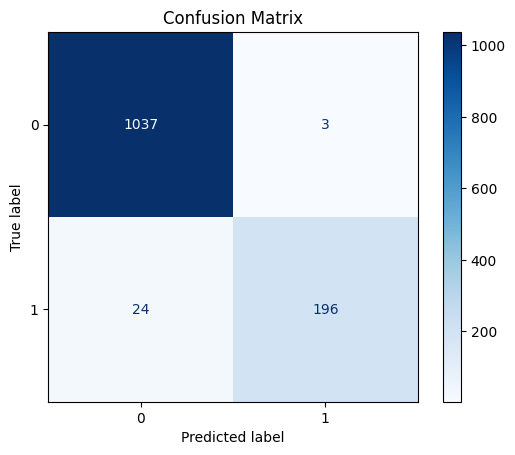

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Assuming binary classification (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

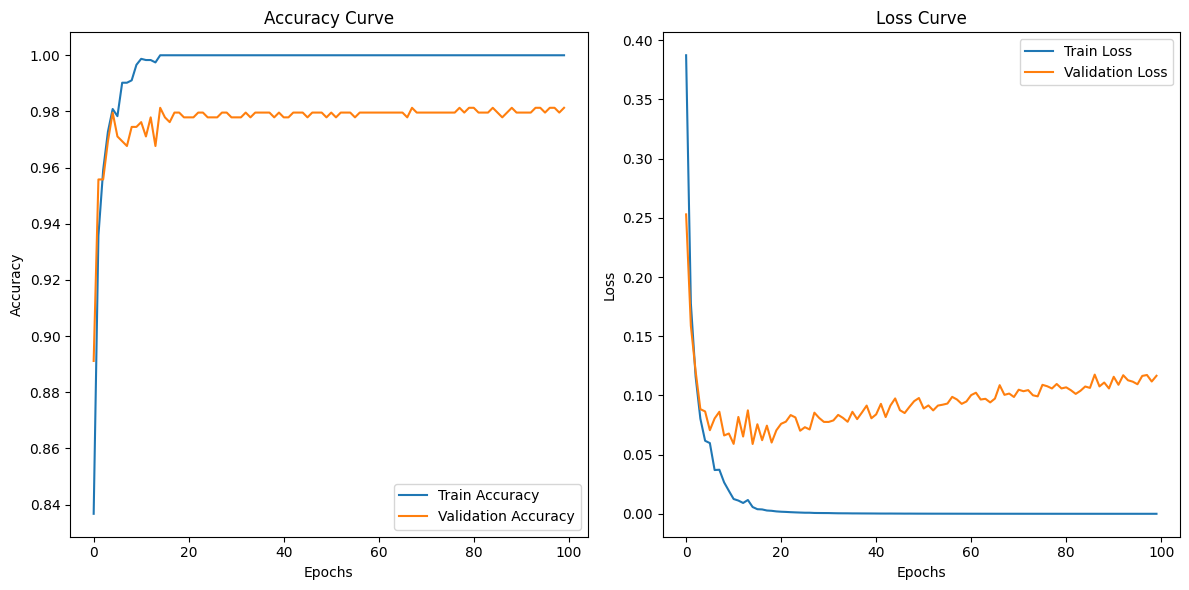

In [ ]:
# Plot accuracy curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
